In [1]:
!pip install statsmodels

#ПРАКТИЧНЕ ЗАВДАННЯ 1.
Для Ваших часових даних(кожній команді підібрати самостійно) побудувати моделі

Kom.2 МА(2), ARIMA(1,2,1)

Для усіх моделей побудувати прогнози та обчислити похибки прогнозування

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_process import ArmaProcess
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

<ipython-input-25-f3aa1f3dbd2d>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flights['date'] = pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: 

MA(2) MSE: 41319.23, MAE: 177.01
ARIMA(1,2,1) MSE: 5435.90, MAE: 57.19


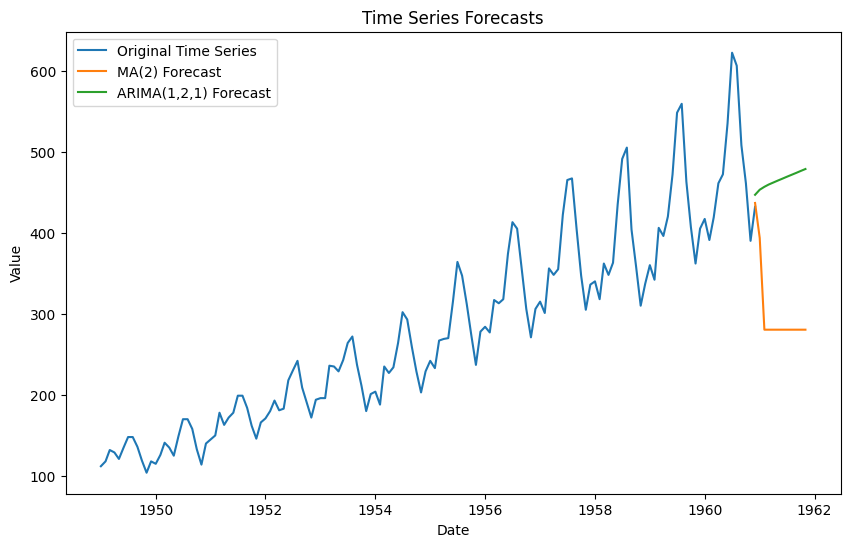

In [25]:
# Завантаження набору даних з seaborn
flights = sns.load_dataset('flights')

# Конвертація категоріального стовпця 'month' у рядковий формат
flights['month'] = flights['month'].astype(str)

# Створення стовпця 'date' із року та місяця
flights['date'] = pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'])

# Встановлення стовпця 'date' як індексу DataFrame
flights.set_index('date', inplace=True)

# Вибір часових рядів
time_series = flights['passengers']

# Побудова моделі MA(2)
ma_order = 2
ma_model = ARIMA(time_series, order=(0, 0, ma_order))
ma_fit = ma_model.fit()
ma_forecast = ma_fit.forecast(steps=12)  # Прогноз на 12 місяців

# Побудова моделі ARIMA(1,2,1)
arima_order = (1, 2, 1)
arima_model = ARIMA(time_series, order=arima_order)
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=12)  # Прогноз на 12 місяців

# Обчислення похибок прогнозування
actual = time_series[-12:]  # Фактичні значення за останні 12 періодів
ma_mse = mean_squared_error(actual, ma_forecast)
ma_mae = mean_absolute_error(actual, ma_forecast)
arima_mse = mean_squared_error(actual, arima_forecast)
arima_mae = mean_absolute_error(actual, arima_forecast)

# Вивід результатів
print(f'MA(2) MSE: {ma_mse:.2f}, MAE: {ma_mae:.2f}')
print(f'ARIMA(1,2,1) MSE: {arima_mse:.2f}, MAE: {arima_mae:.2f}')

# Візуалізація прогнозів
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series, label='Original Time Series')
plt.plot(pd.date_range(time_series.index[-1], periods=12, freq='MS'), ma_forecast, label='MA(2) Forecast')
plt.plot(pd.date_range(time_series.index[-1], periods=12, freq='MS'), arima_forecast, label='ARIMA(1,2,1) Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecasts')
plt.show()

#ПРАКТИЧНЕ ЗАВДАННЯ 2.
Для Ваших даних (кожній команді підібрати самостійно) побудувати моделі та алгоритми і здійснити програмну реалізацію. Навести аналіз та візуалізацію результатів. Порівняльний аналіз моделі АRFIMA(n,q,m) з результатами Пр.зав. 2:

· Модель АRFIMA(n,q,m), q-дробовий параметр .

· Алгоритм мультифрактального аналізу.

In [13]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.0 MB/s eta 0:00:00


In [33]:
!pip install fractpy

<ipython-input-35-574c7c4b9c64>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flights['date'] = pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


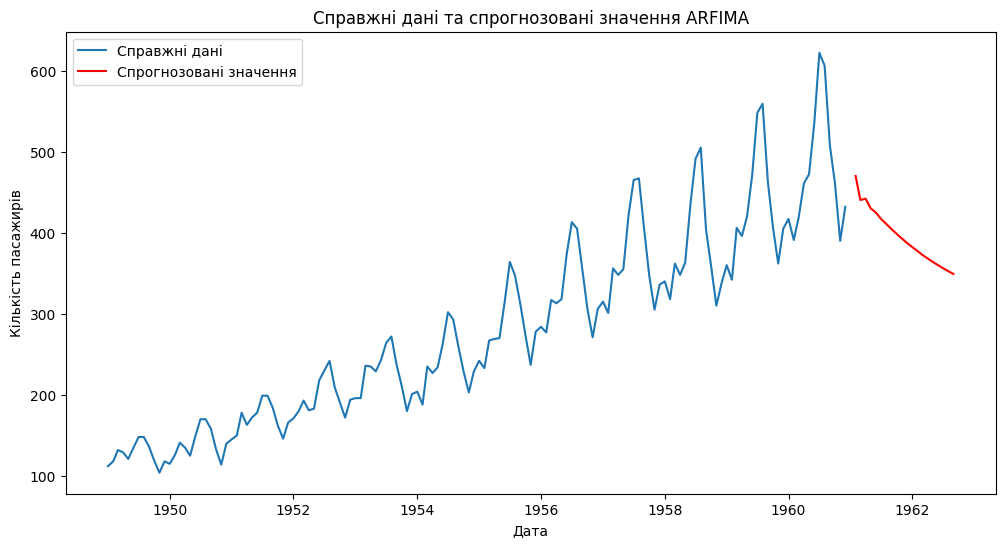

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from scipy.special import gamma

# Завантаження набору даних з seaborn
flights = sns.load_dataset('flights')

# Конвертація категоріального стовпця 'month' у рядковий формат
flights['month'] = flights['month'].astype(str)

# Створення стовпця 'date' із року та місяця
flights['date'] = pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'])

# Встановлення стовпця 'date' як індексу DataFrame
flights.set_index('date', inplace=True)

# Вибір часових рядів
time_series = flights['passengers']

# Функція для дробового інтегрування часового ряду
def frac_diff(series, d, lag=1, threshold=0.0001):
    diff_series = series.copy()
    weight = np.array([(d / gamma(k + 1)) for k in range(1000)])
    weight = weight[::-1]

    for i in range(1, len(series)):
        weight_sum = sum(weight[:i] * series[:i])
        diff_series[i] = series[i] - weight_sum

        # Перерва, якщо різниця невелика
        if abs(diff_series[i]) < threshold:
            break

    return diff_series

# Підгонка моделі ARFIMA
def arfima_fit(series, p, d, q):
    integrated_series = frac_diff(series, d)

    model = ARIMA(integrated_series, order=(p, 0, q))
    model_fit = model.fit()

    return model_fit

# Прогнозування за допомогою ARFIMA моделі
def arfima_forecast(model_fit, steps=10):
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Параметри моделі ARFIMA
p = 2  # Порядок AR
d = 0.4  # Дробовий порядок інтегрування
q = 1  # Порядок MA

# Підгонка моделі ARFIMA
arfima_model_fit = arfima_fit(time_series, p, d, q)

# Прогнозування наступних 50 кроків
forecast_steps = 20
forecast = arfima_forecast(arfima_model_fit, steps=forecast_steps)

# Остання дата у часовому ряду
last_date = time_series.index[-1]

# Створення прогнозованих дат
forecast_dates = pd.date_range(last_date, periods=forecast_steps + 1, freq='M')[1:]

# Візуалізація справжніх даних та спрогнозованих значень
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Справжні дані')
plt.plot(forecast_dates, forecast, label='Спрогнозовані значення', color='red')
plt.xlabel('Дата')
plt.ylabel('Кількість пасажирів')
plt.legend()
plt.title('Справжні дані та спрогнозовані значення ARFIMA')
plt.show()


<ipython-input-40-d15d733c33c7>:36: RuntimeWarning: divide by zero encountered in log
  log_rms = np.log(rms_fluctuations)


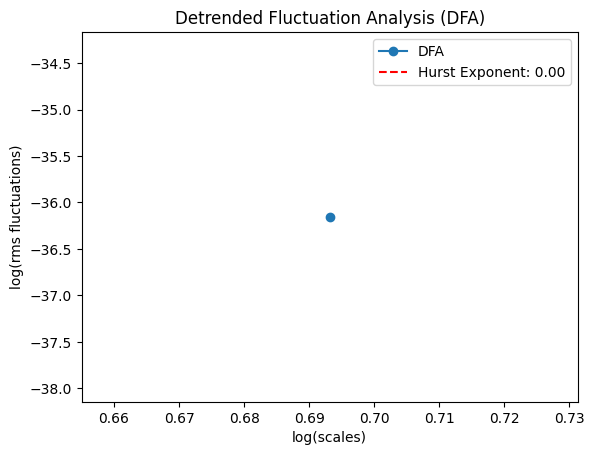

Hurst Exponent: 0.00


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def detrended_fluctuation_analysis(series, scales):
    """Обчислення флуктуацій, що детрендуються."""
    rms_fluctuations = []
    for scale in scales:
        rms_sum = []
        num_segments = int(len(series) / scale)
        for i in range(num_segments):
            segment = series[i * scale: (i + 1) * scale]

            # Створення масиву x (від 0 до scale - 1)
            x = np.arange(scale)
            y = segment

            # Використання LinearRegression з sklearn для обчислення лінійної трендової лінії
            model = LinearRegression()
            model.fit(x.reshape(-1, 1), y)

            # Обчислення тренду та відхилення
            trend = model.predict(x.reshape(-1, 1))
            rms = np.sqrt(np.mean((segment - trend) ** 2))
            rms_sum.append(rms)
        rms_fluctuations.append(np.mean(rms_sum))
    return scales, rms_fluctuations

def calculate_multifractal_spectrum(series, scales):
    """Розрахунок мультифрактального спектру."""
    # Виконання Detrended Fluctuation Analysis (DFA)
    scales, rms_fluctuations = detrended_fluctuation_analysis(series, scales)

    # Визначення логарифмічної поведінки
    log_scales = np.log(scales)
    log_rms = np.log(rms_fluctuations)

    # Перевірка та обробка некоректних значень у log_rms та log_scales
    valid_indices = ~np.isnan(log_rms) & ~np.isnan(log_scales) & ~np.isinf(log_rms) & ~np.isinf(log_scales)
    log_rms = log_rms[valid_indices]
    log_scales = log_scales[valid_indices]

    # Виконання регресії з використанням sklearn
    model = LinearRegression()
    log_scales_reshaped = log_scales.reshape(-1, 1)
    model.fit(log_scales_reshaped, log_rms)
    hurst_exponent = model.coef_[0]

    # Візуалізація результатів
    plt.figure()
    plt.plot(log_scales, log_rms, 'o-', label='DFA')
    plt.plot(log_scales, model.predict(log_scales_reshaped), 'r--', label=f'Hurst Exponent: {hurst_exponent:.2f}')
    plt.xlabel('log(scales)')
    plt.ylabel('log(rms fluctuations)')
    plt.title('Detrended Fluctuation Analysis (DFA)')
    plt.legend()
    plt.show()

    return hurst_exponent

# Вибір шкал для аналізу
scales = np.logspace(0, 1, num=30, base=2).astype(int)

# Приклад даних часового ряду (замініть `time_series` на свій часопис)
time_series = np.random.randn(1000)  # приклад даних часового ряду

# Обчислення мультифрактального спектру
hurst_exponent = calculate_multifractal_spectrum(time_series, scales)
print(f'Hurst Exponent: {hurst_exponent:.2f}')


#ПРАКТИЧНЕ ЗАВДАННЯ 3.
Здійснити програмну реалізацію для застосування фрактальних масок розпізнавання зображень, вказаних у матеріалі (зображення також можна підбирати самостійно) та навести результати аналізу.

Ком.2, 4        Маска    B,F


<ipython-input-47-9159a5fcec19>:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread("images.jpg", mode='L')


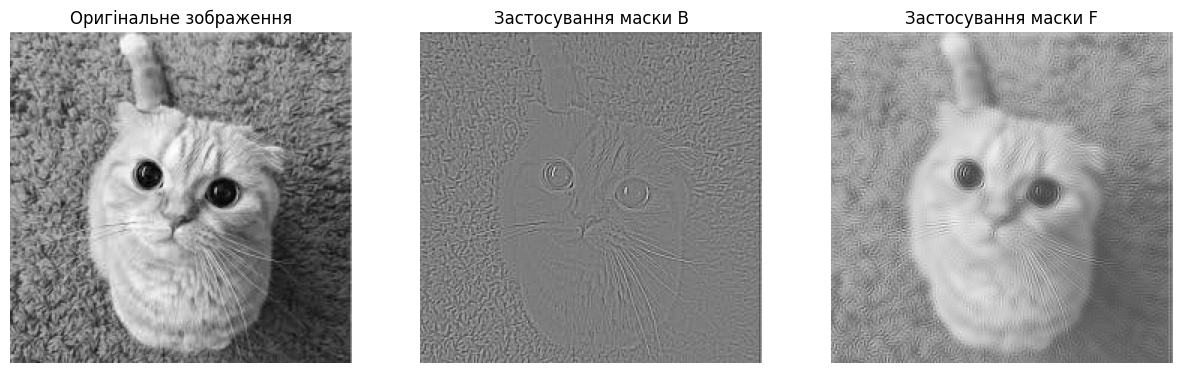

In [47]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def apply_fractal_mask(image, mask):
    """
    Застосування фрактальної маски до зображення.

    Parameters:
    image: np.array
        Вхідне зображення для обробки.
    mask: np.array
        Фрактальна маска для застосування.

    Returns:
    np.array
        Зображення після застосування фрактальної маски.
    """
    # Застосування згортаючої фільтрації
    result = convolve2d(image, mask, mode='same', boundary='symm')

    return result

# Завантаження зображення
image = imageio.imread("images.jpg", mode='L')

# Створення фрактальних масок
# Маска першого порядку
mask_B = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Маска п'ятого порядку
mask_F = np.array([
    [1,  1,  1,  1, 1],
    [1, -2, -3, -2, 1],
    [1, -3, 15, -3, 1],
    [1, -2, -3, -2, 1],
    [1,  1,  1,  1, 1]
])

# Застосування масок до зображення
result_B = apply_fractal_mask(image, mask_B)
result_F = apply_fractal_mask(image, mask_F)

# Візуалізація результатів
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Оригінальне зображення')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(result_B, cmap='gray')
plt.title('Застосування маски B')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_F, cmap='gray')
plt.title('Застосування маски F')
plt.axis('off')

plt.show()
